In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.shape

(20640, 10)

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


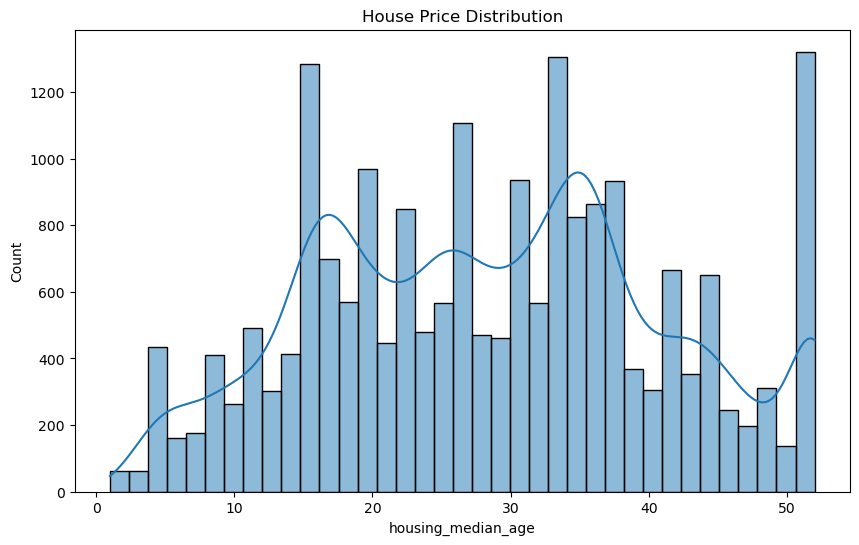

In [6]:
# Distribution Plot
sns.histplot(df['housing_median_age'], kde=True)
plt.title('House Price Distribution')
plt.show()

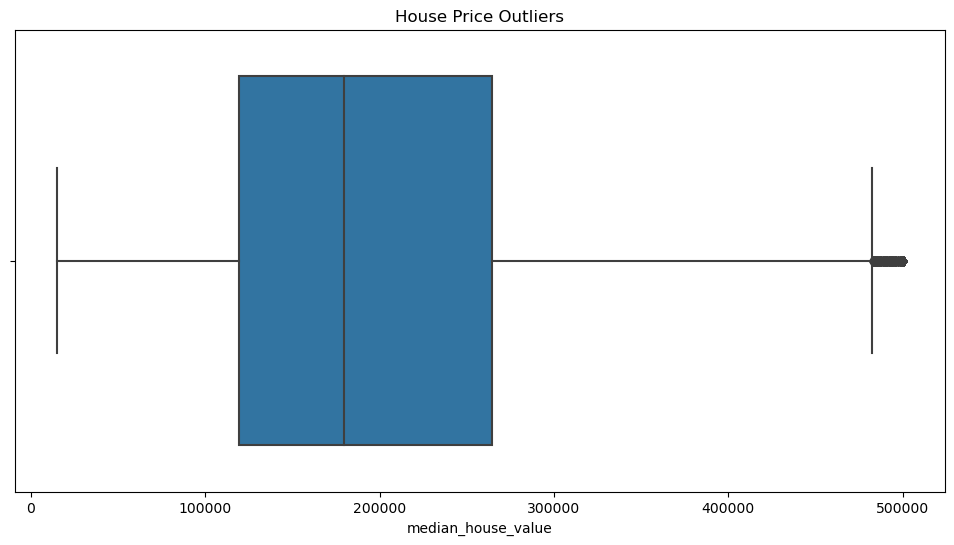

In [7]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["median_house_value"])
plt.title("House Price Outliers")
plt.show()

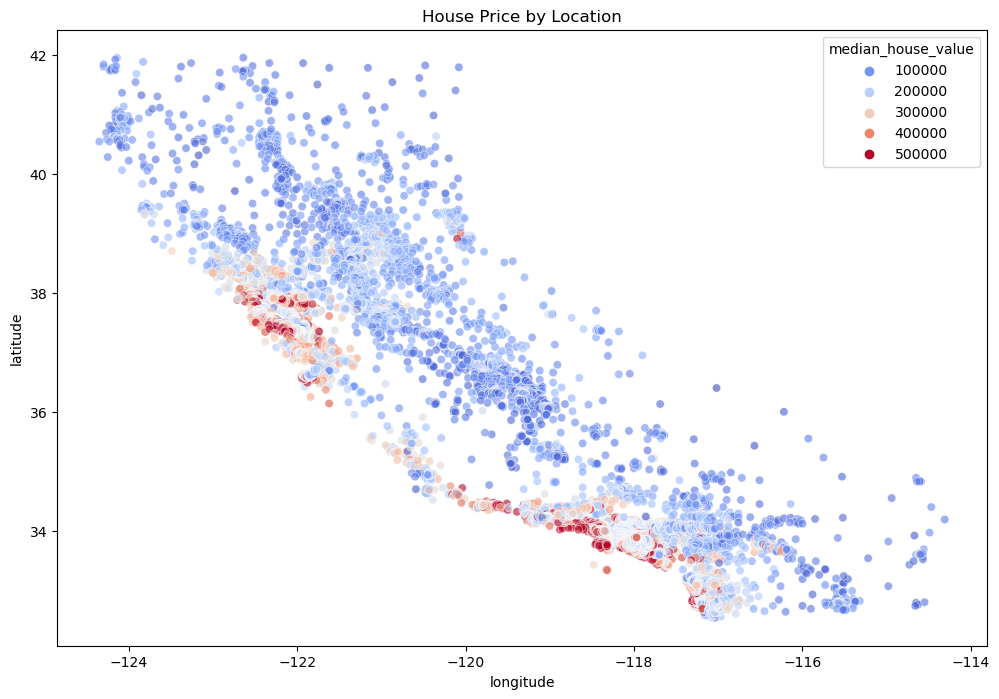

In [8]:
# Scatter Plot
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['median_house_value'],palette='coolwarm', alpha=0.6)
plt.title('House Price by Location')
plt.show()

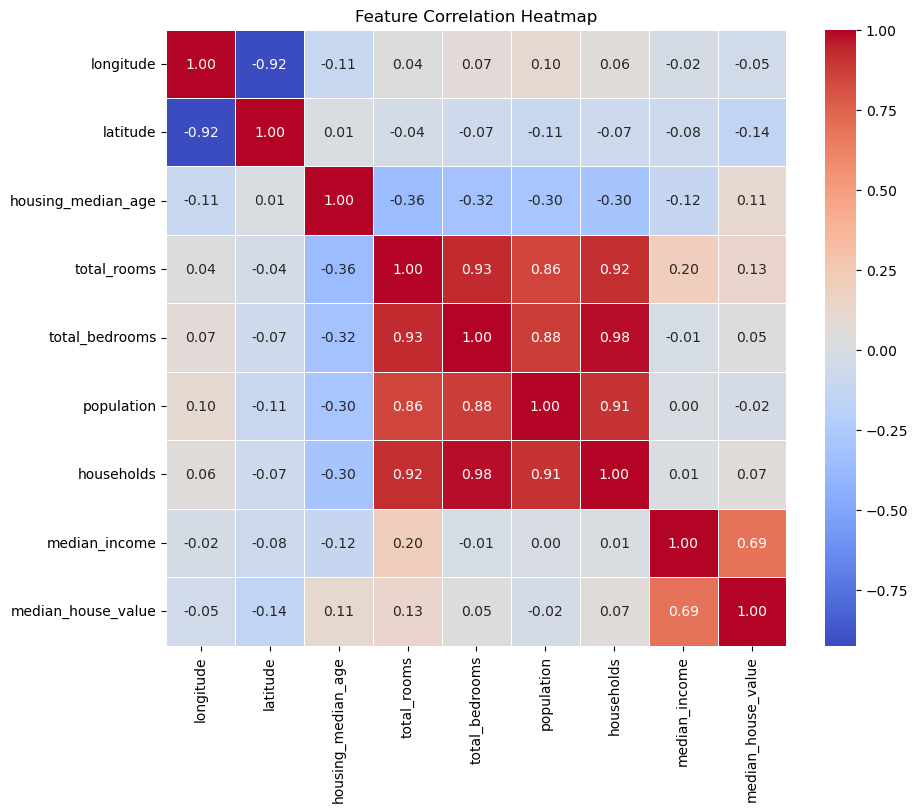

In [9]:
# Correlation matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
# Data Shape
print('Train Data:', df.shape)

Train Data: (20640, 10)


In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
# Missing Data
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

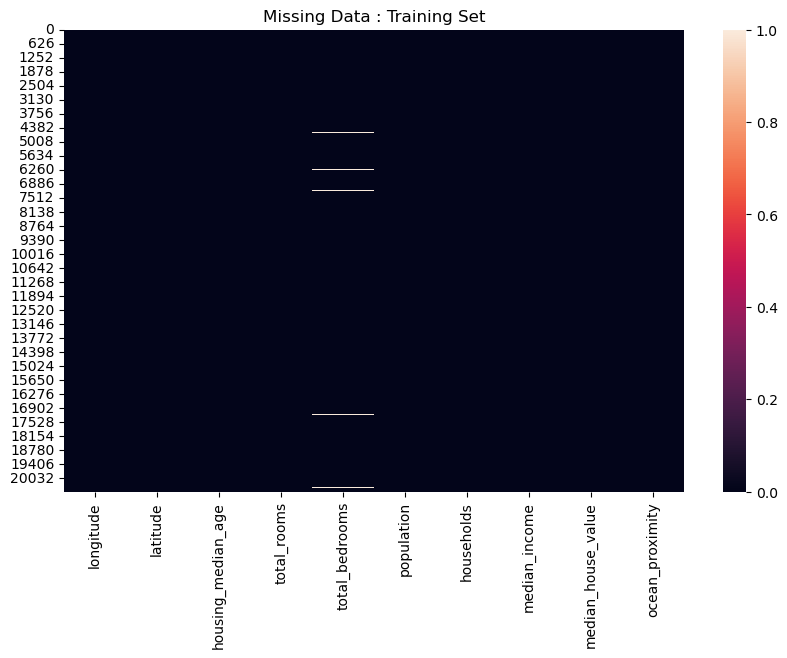

In [15]:
# Heatmap
sns.heatmap(df.isnull())
plt.title('Missing Data : Training Set')
plt.show()

In [16]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [17]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [18]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [19]:
objcat = ['ocean_proximity']

for colname in objcat:
    df[colname] = df[colname].astype('category')

In [20]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Getting Model Ready

In [21]:
# Shape of train data
df.shape

(20640, 10)

In [22]:
# Identify Categorical Features
df.select_dtypes(['category']).columns

Index(['ocean_proximity'], dtype='object')

In [23]:
# One-Hot Encoding
ocean_proximity = pd.get_dummies(df['ocean_proximity'])

In [24]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
# Add new dummy columns to data Frame
df = pd.concat([df, ocean_proximity], axis = 1)
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [26]:
# Drop unnecessary columns
df.drop(['ocean_proximity'], axis = 1, inplace = True)

# Shape of Train Data
print('Shape of Train Data:', df.shape)

df.head()

Shape of Train Data: (20640, 14)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [27]:
# Split data to be used in models
# Create matrix of features
x = df.drop('median_house_value', axis = 1)

# Create target variable
y = df['median_house_value']

In [28]:
# Shape of Features
x.shape

(20640, 13)

In [29]:
# Shape of Target Variable
y.shape

(20640,)

In [30]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [31]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Random Forest Regressor

In [32]:
# Fit
# Import model
from sklearn.ensemble import RandomForestRegressor

# Instance the model
model = RandomForestRegressor()

# Pass training data into model
model.fit(x_train, y_train)

RandomForestRegressor()

In [33]:
# Predict
y_pred = model.predict(x_test)
print(y_pred)

[202540.   133720.04 120716.   ... 150647.02  85175.   132300.  ]


In [34]:
# Score It
from sklearn.metrics import mean_squared_error
import numpy as np

print('Random Forest Regression Model')
print('---'*30)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# Root Mean Squared Error
rmse = np.sqrt(mse)

# Print evaluation metrics
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Random Forest Regression Model
------------------------------------------------------------------------------------------
Mean Squared Error: 2247025942.195468
Root Mean Squared Error: 47402.80521441181


In [35]:
# R2 Score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.4f}")

print(f"Model R^2 Score: {r2 * 100:.2f}%")

R^2 Score: 0.8332
Model R^2 Score: 83.32%


In [36]:
# New house features 

new_data = [[
    -122.23,   # longitude
    37.88,     # latitude
    41,        # housing_median_age
    880,       # total_rooms
    129,       # total_bedrooms
    322,       # population
    126,       # households
    8.3252,    # median_income
    0,         # <1H OCEAN
    0,         # INLAND
    0,         # ISLAND
    1,         # NEAR BAY 
    0          # NEAR OCEAN
]]

# Scale new house data
scaled_data = scaler.transform(new_data)  
# Predict
predicted_price = model.predict(scaled_data)

print(f'The predicted price of the house is: ${round(predicted_price[0], 2)}')


The predicted price of the house is: $441455.1


In [37]:
# If we predict three houses prices
houses = [[-122.23, 37.88, 41, 880, 129, 322, 126, 8.3252, 0, 0, 0, 1, 0],
          [-122.25, 37.89, 30, 900, 140, 300, 150, 7.15, 0, 0, 0, 0, 1], 
          [-122.50, 37.70, 20, 1100, 200, 400, 180, 6.5, 1, 0, 0, 0, 0],
         ] 

scaled_houses = scaler.transform(houses) 

predict_price = model.predict(scaled_houses)
print(f'Predicted price of houses are: ${round(predict_price[0], 2)}, ${round(predict_price[1],2)}, ${round(predict_price[2],2)}')

Predicted price of houses are: $441455.1, $406174.18, $340792.13


In [38]:
import pickle

# Save model to file
with open('house_price_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print('File Saved.')

File Saved.


In [39]:
# Save the Scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
    
print('File Saved.')

File Saved.
